# To begin with
This notes go through the choice of good control variable by drawing graphs. This notes can be regarded as a easier version of the notes on pearl's causal model.

In practice, it is always good to first write the relationship graph of the variables before choosing the write model.

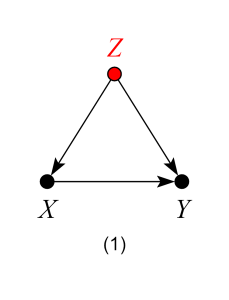

In [3]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "CI1.png", width = 150, height = 75)

# A starting example

We make the following assumption: each variable has its own disturbance, which is purely exogeneous and independent.i.e.

- A variable's disturbance does not change with the observed variance of any variables
- variables' distrubances are independent with each other.

We first see graph(1).Suppose from now on that we always want to see the effect of $x$ on $y$

In this case, if not conditional on $z$, then
- The change of $x$ is the result of
    - the disturbance of $x$, $\epsilon(x)$
    - the change of $z$
- The change of $y$ is the result of 
    - The disturbance of $y$, $\epsilon(y)$
    - the change of $z$
    - the change of $x$

In otherwords,in this graph, if not conditioning on anything, <b>for two individuals, their difference in $x$ is due to the inherent disturbance of $x$ plus their difference in $z$. Their difference in $y$ in due to the inherent disturbance of $y$, their difference in $z$ and $x$.</b>

We can write down the above decomposition as 
$$\Delta(x)=\epsilon(x)+\Delta(z)$$
$$\Delta(y)=\epsilon(y)+\Delta(z)+\Delta(x)$$
Notice! <b>Here we should interprete $=$ as 'comes from', and $+$ as 'and'.</b>

we can see here that both $\Delta(x)$ and $\Delta(y)$ contains $\Delta(z)$,then we cannot get a consistent estimation of the direct effect of $x$ on $y$:$\Delta(z)$, a compound part, pollutes the estimate. 

By conditional on z, however , we have the following:
- The change of x is the results of
    - The disturbance of x, $\epsilon(x)$

- The change of y is the result of
    - The disturbance of y, $\epsilon(y)$
    - the change of x

In other words,in this graph, if  conditioning on $z$, <b>for two individuals who have the same $z$, their difference in $x$ is due to the inherent disturbance of $x$. Their difference in $y$ in due to the inherent disturbance of $y$ and their difference in $x$.</b>

Since $\Delta(z)=0$.We can write down the decsomposition as 
$$\Delta(x)=\epsilon(x)$$
$$\Delta(y)=\epsilon(y)+\Delta(x)$$

We can see here that there is no third party factor that is in both $\Delta(x)$ and $\Delta(y)$.Therefore we can get a consistent estaimtion of the direct effect of $x$ on $y$. 




# Summary of the procedure of analysis
Basically, To determin the good control variable given our graph, we do the following:
- Draw a graph (with no loop!) to show the causal relationship between variables.
- According to the graph, decompose $\Delta(x)$ and $\Delta(y)$. Try to decompose $\Delta(y)$ into $\Delta(x)$ & something else.
- Judge the model by:
    - (a)<b> $\Delta(y)$ contains $\Delta(x)$.</b>
    - (b)<b> there is no other <b>third party common or factor</b> in $\Delta(x)$ and in $\Delta(y)$.</b>
    - (c)<b> $\Delta(x)$ contributes a large ratio to $\Delta(y)$ </b>

(a) makes sure we can estimate the effect of $x$ on $y$.

(b) makes sure that we can get a consistent estimate of $x$ on $y$.

(c) helps to make the estimation precise. 


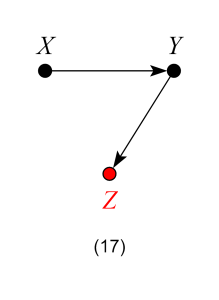

In [8]:
Image(filename = "CI3.png", width = 150, height = 75)

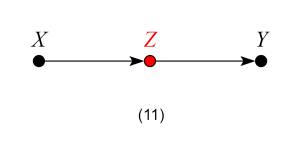

In [13]:
Image(filename = "CI8.png", width = 150, height = 75)

## Issues on (a)
###  Example 1
See graph (11). not conditioning on $z$ leads to 
$$\Delta(x)= \epsilon(x)$$
$$\Delta(y)= \epsilon(y)+ \Delta(z)=\epsilon(y)+ \epsilon(z)+\Delta(x)$$
if we condition on $z$, however, 
$$0=\Delta(z)= \epsilon(z)+\Delta(x)$$
Therefore
$$\Delta(x)=-\epsilon(z)$$
$$\Delta(y)= \epsilon(y)+\Delta(z)=\epsilon(y)$$
Intuitively, for two individuals with the same $z$ , their difference in $x$ totally reflect the inherent disturbance of $z$, and their difference in $y$ totally relflect the inherent disturbance of $y$. Therefore, the difference in $x$ is in fact indepent of the difference in $y$!i.e, $\Delta(y)$ contains no information of $\Delta(x)$. In this sense, $z$ is a bad control!

in fact, if we put both $x$ and $z$ into the regression, the effect of $x$ will absorbed by the $z$. A strategy is

- Regression: $z \rightarrow x$, get the residual $\hat{\epsilon_z}$,
- Regression: $y \rightarrow x, \hat{\epsilon_z}$

### Example 2
See figure (17).Not conditioning on anything, we have 
$$\Delta(x)=\epsilon(x)$$
$$\Delta(y)=\Delta(x)+\epsilon(y)$$
Conditioning on $z$, however, we have
$$0=\Delta(z)=\epsilon(z)+\Delta(y)$$
Therefore $\Delta(y)=-\epsilon(z)$: no longer contains $\Delta(x)$! bad control!



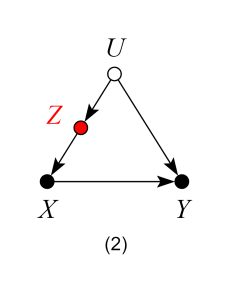

In [9]:
Image(filename = "CI4.png", width = 150, height = 75)

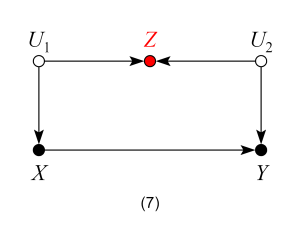

In [10]:
Image(filename = "CI5.png", width = 150, height = 75)

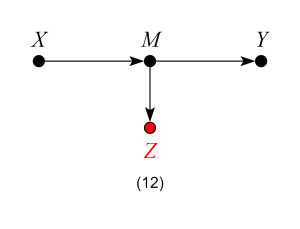

In [11]:
Image(filename = "CI6.png", width = 150, height = 75)

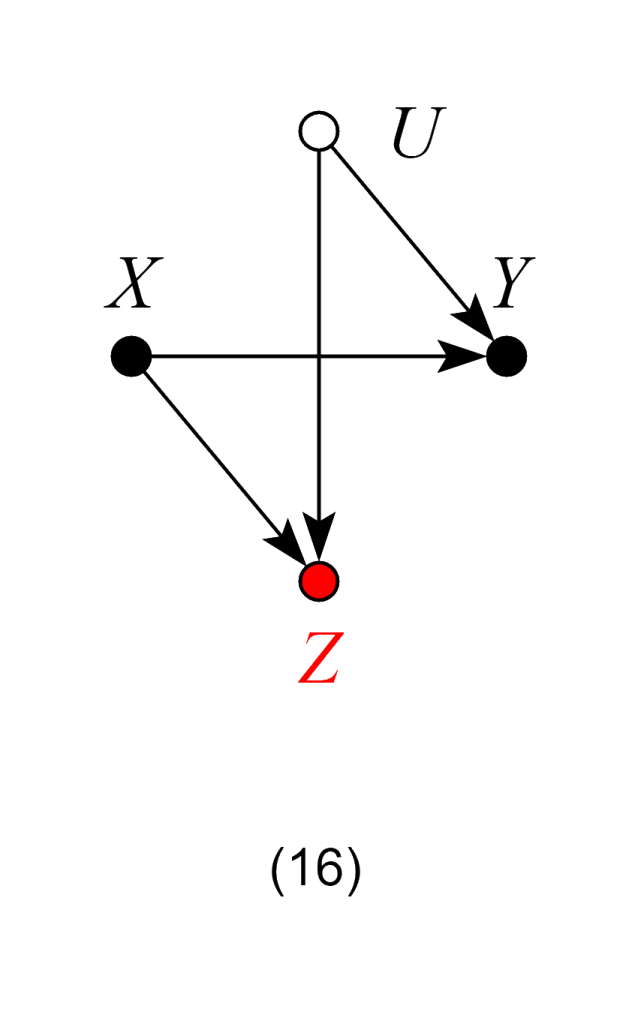

In [12]:
Image(filename = "CI7.png", width = 150, height = 75)

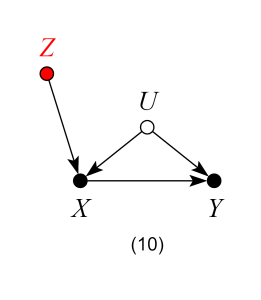

In [17]:
Image(filename = "CI12.png", width = 150, height = 75)

## Issues on (b)
We next present some examples where the choice of control variables matters for consistency. it is also helpful to read this section along with the 'Structural Causal Method'. Basically, if the backdoor path from $x$ to $y$ is not blocked,or only the colider on the backdoor path is blocked, then we get incosistent esitimate of $x$ on $y$.

### Example 1
See figure (2).If we do not condition on anything, then since $$\Delta(z)=\epsilon(z)+ \Delta(u)$$
we have
$$\Delta(x)= \epsilon(x)+\Delta(z)=\epsilon(x)+\epsilon(z)+ \Delta(u)$$
$$\Delta(y)=\epsilon(y)+\Delta(u)+\Delta(x)$$
        
Both $\Delta(x)$ and $\Delta(y)$ contains $\Delta(u)$.Then we cannot get a consistent estimation of the direct effect of $x$ on $y$. If we condition on $z$, however, we have
$$0 = \Delta(z)=\epsilon(z)+ \Delta(u)$$
and
$$\Delta(x)= \epsilon(x)+\Delta(z)=\epsilon(x)$$
$$\Delta(y)=\epsilon(y)+\Delta(u)+\Delta(x)=\epsilon(y)-\epsilon(z)+\Delta(x)$$
<b>Notice here that $-$ does not mean minus or exclude! it only means 'opposite'!!</b>
 other than $x$ and $y$, there is no other third party common or correlated part in the $\Delta(x)$  and in the $\Delta(y)$. Then we can get a consistent estimation on the effect of x on y. conditioning on u can lead to same results.
 
### Example 2 : Collider 
See figure (7). If not conditioning on anything:
$$\Delta(x)=\epsilon(x)+\Delta(u_1)=\epsilon(x)+\epsilon(u_1)$$
$$\Delta(y)=\epsilon(y)+\Delta(u_2)+\Delta(x)=\epsilon(y)+\epsilon(u_2)+\Delta(x)$$
there is no other third part common or correlated part in $\Delta(x)$ and $\Delta(y)$. we can get a consistent estimation on the effect of x on y. If we condition on $z$, however, we have:
 $$0=\Delta(z)=\Delta(u_1)+\Delta(u_2)+\epsilon(z)$$
Now we can rewrite the above decomposition of $\Delta(x)$ as 
$$\Delta(x)=\epsilon(x)+\Delta(u_1)=\epsilon(x)-\Delta(u_2)-\epsilon(z)$$
Obviously there is $\Delta(u)$ in $\Delta(x)$ and $\Delta(y)$. Therefore we cannot get a consistent estimation on the effect of x on y.

### Example 3: 
See graph (12). if not conditioning on anything:
$$\Delta(x)= \epsilon(x)$$
$$\Delta(y)= \epsilon(y)+ \Delta(m)=\epsilon(y)+ \epsilon(m)+\Delta(x)$$
If conditioning on $z$, however:
$$0=\Delta(z)=\epsilon(z)+\Delta(m)=\epsilon(z)+\epsilon(m)+\Delta(x)$$
therefore we observe:
$$\Delta(x)= -\epsilon(z)- \epsilon(m)$$
Which means that the observed variance of $x$ does not come from $x$'s disturbance, but from the inherent disturbance of $z$ and $m$
.On the other hand 
$$\Delta(y)= \epsilon(y)+ \Delta(m)=\epsilon(y)+\epsilon(m)+\Delta(x)$$
Therefore $\Delta(x)$ and $\Delta(y)$ contain common third party factors, leading to inconsistent estimation on the effect of $x$ on $y$

### Example 4: 
See figure 16. Not conditioning on anything, we have
$$\Delta(x)=\epsilon(x)$$
$$\Delta(y)=\Delta(x)+\Delta(u)+\epsilon(y)$$
We can get a consistent estimation. By conditioning on $z$, however, we have
$$0=\Delta(z)=\Delta(x)+\Delta(u)+\epsilon(z) $$
Therefore 
$$\Delta(x)=-\Delta(u)-\epsilon(z)$$
$$\Delta(y)=\Delta(x)+\Delta(u)+\epsilon(y)$$
$\Delta(x)$ contains $\Delta(u)$, and $\Delta(y)$ also contains $\Delta(u)$. No longer consistent. 

### Example 5: Bias Amplification
See figure (10). If not conditioning on anything, we have
$$\Delta(x)=\Delta(z)+\Delta(u)+\epsilon(x)$$
$$\Delta(y)= \epsilon(y)+ \Delta(x)+\Delta(u)$$
Both $\Delta(x)$ and $\Delta(y)$ contains $\Delta(u)$, Therefore we estimation is not consistent. 
if condition on $z$, we have
$$\Delta(x)=\Delta(z)+\Delta(u)+\epsilon(x)=\Delta(u)+\epsilon(x)$$
$$\Delta(y)= \epsilon(y)+ \Delta(x)+\Delta(u)$$
Both $\Delta(x)$ and <b>$\Delta(y)$ contains $\Delta(u)$, and the ratio of $\Delta(u)$ seems to be larger! </b>Therefore we estimation is even more biased.

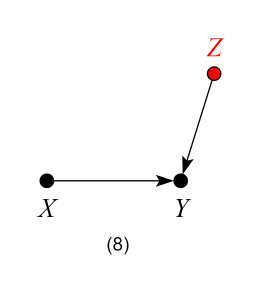

In [7]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "CI2.png", width = 150, height = 75)

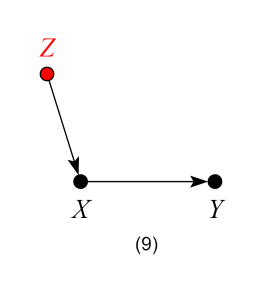

In [14]:
Image(filename = "CI9.png", width = 150, height = 75)

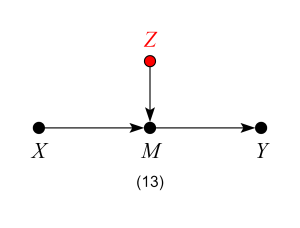

In [15]:
Image(filename = "CI10.png", width = 150, height = 75)

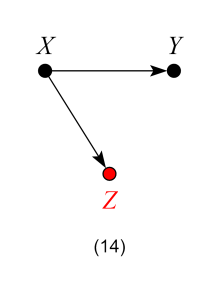

In [16]:
Image(filename = "CI11.png", width = 150, height = 75)

## Issues on (c)
### Example 1:

See figure (8).In this example, if not control on $z$, we get

$$\Delta(x)=\epsilon(x)$$
$$\Delta(y)=\epsilon(y)+\Delta(x)+\Delta(z)$$

    
Of course we still get consistent estimation of the effect of $x$ on $y$. If we condition on the $z$, we have
$$\Delta(y)=\epsilon(y)+\Delta(x)+0$$

compared to the case where we do not condition on the $z$, here, when conditioning on $z$, $\epsilon(x)$ now has a higher contribution in $\Delta(y)$. Therefore, conditioning on $z$ brings higher precisions. 

### Example 2:
See figure 9. In this example, if not condition on $z$, we get

$$\Delta(x)=\epsilon(x)+ \Delta(z)$$
$$\Delta(y)=\epsilon(y)+ \Delta(x)$$
    
If we condition on the $z$, we have 

$$\Delta(x)=\epsilon(x)+ 0$$
$$\Delta(y)=\epsilon(y)+ \Delta(x)$$

Estimation is still consitent, but now the change of $\Delta(x)$ only $\epsilon(x)$. This means that compared to not conditioning on the $z$, when conditioning on $z$, $\Delta(x)$ now has a lower contribution in $\Delta(y)$. Therefore, conditioning on $z$ brings lower precisions. 


## Example 3: 
See figure 13. Not conditioning on anything, we have 
$$\Delta(x)=\epsilon(x)$$
$$\Delta(y)=\epsilon(y)+\Delta(m)=\epsilon(y)+\epsilon(m)+\Delta(x)+\Delta(z)$$
when conditioning on $z$, we have
$$\Delta(y)=\epsilon(y)+\Delta(m)=\epsilon(y)+\epsilon(m)+\Delta(x)$$
The precision of estimation is higher.

## Example 4 :
See figure 14. not conditioning on anything, we have
$$\Delta(x)=\epsilon(x)$$
$$\Delta(y)=\epsilon(y)+\Delta(x)$$
Conditioning on $z$, we have 
$$0=\Delta(z)=\epsilon(z)+\Delta(x)$$
Which implies that 
$$\Delta(x)=-\epsilon(z)$$ but still
$$\Delta(y)=\epsilon(y)+\Delta(x)$$
The estimation is still consistent. And we do not know conditioning on $z$ improves the precision or not. 

Reference:
http://causality.cs.ucla.edu/blog/index.php/category/bad-control/
http://causality.cs.ucla.edu/blog/index.php/category/economics/
